Simple notebook to generate a variety of graphs and store them in the file spec.


In [1]:
import numpy as np
import networkx as nx
from graph import GraphIO


Generate an unattributed ten node star graph and write it. This will result in an archive called `basic_unattributed.mgraph` conatining one directory `graph_0` which in turn has as single `edgelist.csv` file

In [2]:
#load default networkx graph
g = nx.generators.star_graph(10)

In [3]:
# create metagraph object with a single graph, no node attributes and no edge attributes
#attempt dump
GraphIO.dump([g], './ExampleGraphs/basic_unattributed.mgraph')

We can also store node atributes for each graph. Next we load the graph we just created, add betweenness as a node attribute and dump it to disk again.
This will result in an archive called `basic_node_att.mgraph` with a file call `nodeatt_betweenness.json` being added to the `graph_0 directory` along with the same edgelist as above.


In [4]:
# load the star graph
g, _, _, _ = GraphIO.load("./ExampleGraphs/basic_unattributed.mgraph")

In [5]:
# add betweeness attribute to nodes
bb = nx.betweenness_centrality(g[0])
nx.set_node_attributes(g[0], bb, "betweenness")

In [6]:
# dump
GraphIO.dump(g, './ExampleGraphs/basic_node_att.mgraph', node_att_names=[{"betweenness"}])

Similarly, we can add arbitrary edge attributes to the graph. We will add a 'color' attribute to a few of the edges in the star graph.
This will result in an archive called `basic_attributed.mgraph` with the same structure as `basic_node_att.mgraph`, but with and new
file called `edgeatt_color.json` in the `graph_0` directory.

In [8]:
# load
g, edgeatts, nodeatts, graphatts = GraphIO.load('./ExampleGraphs/basic_node_att.mgraph')
att = {(0, 1): "red",
       (0, 2): "blue",
       (0, 5): "red",
       (0, 8): "blue"}
nx.set_edge_attributes(g[0], att, "color")


In [9]:
# dump
GraphIO.dump(g, './ExampleGraphs/basic_attributed.mgraph',
             edge_att_names=[{'color'}],
             node_att_names=nodeatts,
             graph_att_names=graphatts
            )

An arbitrary number of different node and edge attribute types can be added to each graph, each will result in a new `.json` file in that graph's directory.


We can also store multigraphs by have more than one graph directory in the `.mgraph` archive.

In [10]:
g, _, _, _ = GraphIO.load('./ExampleGraphs/basic_attributed.mgraph')

g1 =g[0]
g2 = g[0].copy()

# add new colored edges
g2.add_edge(1, 2, color='green')
g2.add_edge(5, 6, color='red')
g2.add_edge(6, 2, color='green')

# recalculate node betweenness
bb = nx.betweenness_centrality(g2)
nx.set_node_attributes(g2, bb, "betweenness")

Now when we dump the multigraph, we will create an archive with both a `graph_0` and `graph_1` directory. Each will have an edgelist and attribute `.json` files.


In [11]:
GraphIO.dump([g1, g2], './ExampleGraphs/basic_attributed_multigraph.mgraph')


when we load the multigraph again, we will maintain the same ordering between graphs.

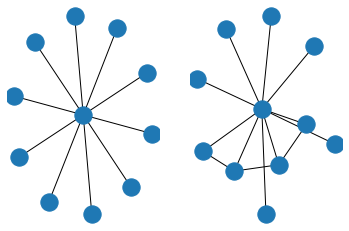

In [12]:
g, _, _, _ = GraphIO.load('./ExampleGraphs/basic_attributed_multigraph.mgraph')
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplot(1, 2, 1)
nx.draw(g[0])
plt.subplot(1, 2, 2)
nx.draw(g[1])
plt.show()
